In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import h5py

from selfpeptide.model.encoder import AA_Tokenizer
from selfpeptide.utils.processing_utils import get_vocabulary_tokens
from selfpeptide.utils.data_utils import load_immunogenicity_dataframes
from selfpeptide.utils.model_utils import *
from selfpeptide.utils.data_utils import split_pretokenized_data, load_immunogenicity_dataframes
from tqdm.notebook import tqdm

In [2]:
human_peptides_fname = "/home/gvisona/Projects/SelfPeptides/processed_data/Self_nonSelf/pre_tokenized_peptides_dataset.hdf5"
with h5py.File(human_peptides_fname, "r") as f:
    print(f.keys())
    reference_human_peptides = f["reference_human_peptides"][:]
    print(f['reference_human_peptides'].shape)

<KeysViewHDF5 ['nonself_peptides', 'reference_human_peptides']>
(52208587, 12)


In [3]:
vocab = get_vocabulary_tokens()
tok = AA_Tokenizer(vocab)

In [4]:
tok(["AAYLK"])

(tensor([[ 0,  0, 20,  9,  8]]), tensor([[False, False, False, False, False]]))

In [5]:
reference_human_peptides[:10]

array([[ 1, 20,  2, 12, 16,  9,  2, 17, 18, 22, 22, 22],
       [16, 11,  7, 16,  9, 17,  9,  1,  2, 15,  1, 11],
       [ 5,  7,  1,  2,  4,  2,  8,  5,  2,  5, 15,  6],
       [ 5, 14,  7, 14,  2, 12,  7,  9, 22, 22, 22, 22],
       [15, 15, 15,  9,  6,  1,  0, 15, 15,  7,  1, 15],
       [ 6, 16,  7,  1, 20,  4, 16,  3,  4,  9, 22, 22],
       [12, 12, 10,  9, 15, 14,  5,  9,  5,  6, 22, 22],
       [15, 15,  9,  3,  5,  4, 13, 18, 22, 22, 22, 22],
       [17,  2,  0, 11,  9, 13,  8,  9, 16, 13, 22, 22],
       [ 9,  9,  0,  7, 11, 13, 14,  4, 13, 22, 22, 22]], dtype=uint8)

In [6]:
config = {"immunogenicity_df": "/home/gvisona/Projects/SelfPeptides/processed_data/Immunogenicity/Processed_TCell_IEDB_Beta_noPrior.csv",
          "pseudo_seq_file": "/home/gvisona/Projects/SelfPeptides/data/NetMHCpan_pseudoseq/MHC_pseudo.dat",
          "dhlap_df": "/home/gvisona/Projects/SelfPeptides/processed_data/Immunogenicity/DHLAP_immunogenicity_data.csv",
          "seed": 0,
          "hla_filter": None,
          "beta_prior": "uniform"
}
imm_df, dhlap_imm_df = load_immunogenicity_dataframes(config, split_data=False)


Applying chosen prior..


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30125/30125 [00:04<00:00, 6732.56it/s]


In [9]:
dhlap_imm_df

,HLA,Peptide,Label,Allele Pseudo-sequence
0,HLA-B08:01,LDRYRSDM,0,YDSEYRNIFTNTDESNLYLSYNYYTWAVDAYTWY
1,HLA-A30:02,LSSYHLHSY,0,YSAMYQENVAHTDENTLYIIYEHYTWARLAYTWY
2,HLA-A02:01,YLKIGTLLV,0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY
3,HLA-A30:02,STSHIIQDY,0,YSAMYQENVAHTDENTLYIIYEHYTWARLAYTWY
4,HLA-A02:01,PLNEGIMAV,0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY
...,...,...,...,...
10618,HLA-A02:01,SLFGKLQLQL,1,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY
10619,HLA-B07:02,CPTQGEPSL,0,YYSEYRNIYAQTDESNLYLSYDYYTWAERAYEWY
10620,HLA-A02:01,IIINGDIAL,0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY
10621,HLA-A02:01,ILDSFEPLR,0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY


In [14]:
imm_df

,Peptide,HLA,Qualitative Measurement,Number of Subjects Tested,Number of Subjects Positive,Peptide length,Alpha,Beta,Distr. Mean,Distr. Variance,Allele Pseudo-sequence,Target,Sample,Peptide Length,Obs. Mean,Obs. Variance,Stratification_index,Ratio
0,NLVPMVATV,HLA-A02:01,Positive,112.0,59.0,9,60.0,54.0,0.526316,0.002168,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,1,NLVPMVATV_HLA-A02:01,9,0.526316,0.002168,HLA-A02:01_1,0.526786
1,RPPIFIRRL,HLA-B07:02,Positive,112.0,82.0,9,83.0,31.0,0.728070,0.001722,YYSEYRNIYAQTDESNLYLSYDYYTWAERAYEWY,1,RPPIFIRRL_HLA-B07:02,9,0.728070,0.001722,HLA-B07:02_1,0.732143
2,YLQPRTFLL,HLA-A02:01,Positive,112.0,37.0,9,38.0,76.0,0.333333,0.001932,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,1,YLQPRTFLL_HLA-A02:01,9,0.333333,0.001932,HLA-A02:01_1,0.330357
3,GLCTLVAML,HLA-A02:01,Positive,112.0,56.0,9,57.0,57.0,0.500000,0.002174,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,1,GLCTLVAML_HLA-A02:01,9,0.500000,0.002174,HLA-A02:01_1,0.500000
4,TPRVTGGGAM,HLA-B07:02,Positive,112.0,90.0,10,91.0,23.0,0.798246,0.001400,YYSEYRNIYAQTDESNLYLSYDYYTWAERAYEWY,1,TPRVTGGGAM_HLA-B07:02,10,0.798246,0.001400,HLA-B07:02_1,0.803571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30120,VTSSGAIYK,HLA-A11:01,Positive,1.0,1.0,9,2.0,1.0,0.666667,0.055556,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,1,VTSSGAIYK_HLA-A11:01,9,0.666667,0.055556,HLA-A11:01_1,1.000000
30121,GVTSSGAIYK,HLA-A33:03,Negative,1.0,0.0,10,1.0,2.0,0.333333,0.055556,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWY,0,GVTSSGAIYK_HLA-A33:03,10,0.333333,0.055556,HLA-A33:03_0,0.000000
30122,GVTSSGAIYK,HLA-A11:01,Positive,1.0,1.0,10,2.0,1.0,0.666667,0.055556,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,1,GVTSSGAIYK_HLA-A11:01,10,0.666667,0.055556,HLA-A11:01_1,1.000000
30123,MLFYMDLSY,HLA-A33:03,Negative,1.0,0.0,9,1.0,2.0,0.333333,0.055556,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWY,0,MLFYMDLSY_HLA-A33:03,9,0.333333,0.055556,HLA-A33:03_0,0.000000


In [13]:
imm_df["Ratio"] = imm_df["Number of Subjects Positive"]/imm_df["Number of Subjects Tested"]

<Axes: xlabel='Target', ylabel='Ratio'>

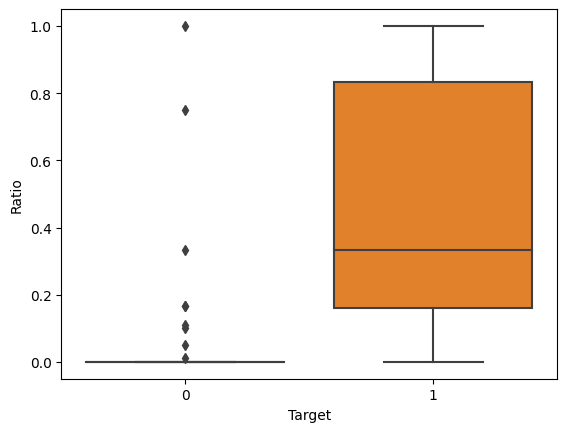

In [16]:
sns.boxplot(imm_df, x="Target", y="Ratio")

In [8]:
imm_peptides = imm_df["Peptide"].values
tok_imm_peptides, _ = tok(imm_peptides.tolist())
tok_imm_peptides = tok_imm_peptides.numpy().astype('uint8')

In [46]:
for i in tqdm(range(len(tok_imm_peptides))):
    for j in range(len(reference_human_peptides)):
        if (tok_imm_peptides[i]==reference_human_peptides[j]):#.all():
            c = d
        

  0%|          | 0/30049 [00:00<?, ?it/s]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [47]:
(reference_human_peptides[0]==reference_human_peptides[0]).all()

True

In [65]:

# nrows, ncols = tok_imm_peptides.shape
# dtype={'names':['f{}'.format(i) for i in range(ncols)],
#        'formats':ncols * [tok_imm_peptides.dtype]}

# C = np.intersect1d(tok_imm_peptides.view(dtype), reference_human_peptides[:100].view(dtype))

# # This last bit is optional if you're okay with "C" being a structured array...
# C = C.view(tok_imm_peptides.dtype).reshape(-1, ncols)

In [51]:
C

array([], shape=(0, 12), dtype=uint8)

In [49]:
tok_imm_peptides.astype(str)

array([['11', '9', '17', ..., '22', '22', '22'],
       ['14', '12', '12', ..., '22', '22', '22'],
       ['20', '9', '13', ..., '22', '22', '22'],
       ...,
       ['5', '17', '16', ..., '8', '22', '22'],
       ['10', '9', '4', ..., '22', '22', '22'],
       ['10', '3', '0', ..., '4', '22', '22']], dtype='<U3')

In [44]:
reference_human_peptides.dtype

dtype('uint8')

In [64]:
tok_imm_peptides_set = set("".join(r) for r in np.vectorize(tok.idx2token.get)(tok_imm_peptides))
tok_imm_peptides_list = ["".join(r) for r in np.vectorize(tok.idx2token.get)(tok_imm_peptides)]

In [62]:
reference_human_peptides_set = set("".join(r) for r in np.vectorize(tok.idx2token.get)(reference_human_peptides))

In [66]:
sp = []

for i in tqdm(range(len(tok_imm_peptides_list))):
    if tok_imm_peptides_list[i] in reference_human_peptides_set:
        sp.append(1)
    else:
        sp.append(0)

  0%|          | 0/30049 [00:00<?, ?it/s]

In [69]:
imm_df["SP"] = sp
imm_df

,Peptide,HLA,Qualitative Measurement,Number of Subjects Tested,Number of Subjects Positive,Peptide length,Alpha,Beta,Distr. Mean,Distr. Variance,Allele Pseudo-sequence,Target,Sample,Peptide Length,Obs. Mean,Obs. Variance,Stratification_index,SP
0,NLVPMVATV,HLA-A02:01,Positive,112.0,59.0,9,60.0,54.0,0.526316,0.002168,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,1,NLVPMVATV_HLA-A02:01,9,0.526316,0.002168,HLA-A02:01_1,0
1,RPPIFIRRL,HLA-B07:02,Positive,112.0,82.0,9,83.0,31.0,0.728070,0.001722,YYSEYRNIYAQTDESNLYLSYDYYTWAERAYEWY,1,RPPIFIRRL_HLA-B07:02,9,0.728070,0.001722,HLA-B07:02_1,0
2,YLQPRTFLL,HLA-A02:01,Positive,112.0,37.0,9,38.0,76.0,0.333333,0.001932,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,1,YLQPRTFLL_HLA-A02:01,9,0.333333,0.001932,HLA-A02:01_1,0
3,GLCTLVAML,HLA-A02:01,Positive,112.0,56.0,9,57.0,57.0,0.500000,0.002174,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,1,GLCTLVAML_HLA-A02:01,9,0.500000,0.002174,HLA-A02:01_1,0
4,TPRVTGGGAM,HLA-B07:02,Positive,112.0,90.0,10,91.0,23.0,0.798246,0.001400,YYSEYRNIYAQTDESNLYLSYDYYTWAERAYEWY,1,TPRVTGGGAM_HLA-B07:02,10,0.798246,0.001400,HLA-B07:02_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30120,VTSSGAIYK,HLA-A11:01,Positive,1.0,1.0,9,2.0,1.0,0.666667,0.055556,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,1,VTSSGAIYK_HLA-A11:01,9,0.666667,0.055556,HLA-A11:01_1,0
30121,GVTSSGAIYK,HLA-A33:03,Negative,1.0,0.0,10,1.0,2.0,0.333333,0.055556,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWY,0,GVTSSGAIYK_HLA-A33:03,10,0.333333,0.055556,HLA-A33:03_0,0
30122,GVTSSGAIYK,HLA-A11:01,Positive,1.0,1.0,10,2.0,1.0,0.666667,0.055556,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,1,GVTSSGAIYK_HLA-A11:01,10,0.666667,0.055556,HLA-A11:01_1,0
30123,MLFYMDLSY,HLA-A33:03,Negative,1.0,0.0,9,1.0,2.0,0.333333,0.055556,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWY,0,MLFYMDLSY_HLA-A33:03,9,0.333333,0.055556,HLA-A33:03_0,0


In [70]:
imm_df[["Target", "SP"]].value_counts()

Target  SP
0       0     23924
1       0      4617
0       1       947
1       1       561
dtype: int64

In [71]:
from scipy.stats import kendalltau

In [72]:
kendalltau(imm_df["Target"], imm_df["SP"])

SignificanceResult(statistic=0.12154603536913361, pvalue=1.5240189291934533e-98)

<Axes: xlabel='SP', ylabel='Obs. Mean'>

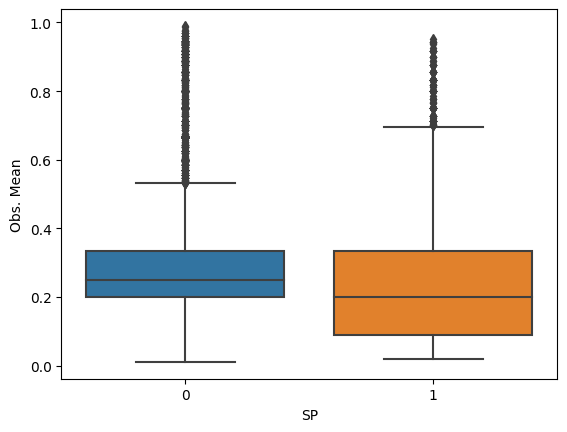

In [74]:
sns.boxplot(imm_df, x="SP", y="Obs. Mean")

In [6]:
sns_model = load_sns_model("/home/gvisona/Projects/SelfPeptides/trained_models/sns_model")

In [9]:
data = imm_df["Peptide"].values.tolist()

In [10]:
projections, embeddings, sns_scores = sns_model(data, return_sns_score=True)

In [12]:
imm_df["SNS_score"] = sns_scores.detach().numpy().flatten()
imm_df

,Peptide,HLA,Qualitative Measurement,Number of Subjects Tested,Number of Subjects Positive,Peptide length,Alpha,Beta,Distr. Mean,Distr. Variance,Allele Pseudo-sequence,Target,Sample,Peptide Length,Obs. Mean,Obs. Variance,Stratification_index,SNS_score
0,NLVPMVATV,HLA-A02:01,Positive,112.0,59.0,9,60.0,54.0,0.526316,0.002168,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,1,NLVPMVATV_HLA-A02:01,9,0.526316,0.002168,HLA-A02:01_1,0.824410
1,RPPIFIRRL,HLA-B07:02,Positive,112.0,82.0,9,83.0,31.0,0.728070,0.001722,YYSEYRNIYAQTDESNLYLSYDYYTWAERAYEWY,1,RPPIFIRRL_HLA-B07:02,9,0.728070,0.001722,HLA-B07:02_1,-0.361788
2,YLQPRTFLL,HLA-A02:01,Positive,112.0,37.0,9,38.0,76.0,0.333333,0.001932,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,1,YLQPRTFLL_HLA-A02:01,9,0.333333,0.001932,HLA-A02:01_1,0.943409
3,GLCTLVAML,HLA-A02:01,Positive,112.0,56.0,9,57.0,57.0,0.500000,0.002174,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,1,GLCTLVAML_HLA-A02:01,9,0.500000,0.002174,HLA-A02:01_1,0.983502
4,TPRVTGGGAM,HLA-B07:02,Positive,112.0,90.0,10,91.0,23.0,0.798246,0.001400,YYSEYRNIYAQTDESNLYLSYDYYTWAERAYEWY,1,TPRVTGGGAM_HLA-B07:02,10,0.798246,0.001400,HLA-B07:02_1,0.054589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30120,VTSSGAIYK,HLA-A11:01,Positive,1.0,1.0,9,2.0,1.0,0.666667,0.055556,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,1,VTSSGAIYK_HLA-A11:01,9,0.666667,0.055556,HLA-A11:01_1,-0.101731
30121,GVTSSGAIYK,HLA-A33:03,Negative,1.0,0.0,10,1.0,2.0,0.333333,0.055556,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWY,0,GVTSSGAIYK_HLA-A33:03,10,0.333333,0.055556,HLA-A33:03_0,-0.163642
30122,GVTSSGAIYK,HLA-A11:01,Positive,1.0,1.0,10,2.0,1.0,0.666667,0.055556,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,1,GVTSSGAIYK_HLA-A11:01,10,0.666667,0.055556,HLA-A11:01_1,-0.163642
30123,MLFYMDLSY,HLA-A33:03,Negative,1.0,0.0,9,1.0,2.0,0.333333,0.055556,YTAMYRNNVAHIDVDTLYIMYQDYTWAVLAYTWY,0,MLFYMDLSY_HLA-A33:03,9,0.333333,0.055556,HLA-A33:03_0,-0.626757


<Axes: xlabel='Target', ylabel='SNS_score'>

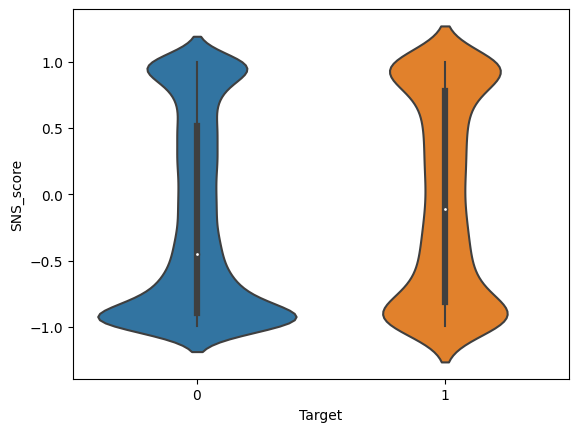

In [13]:
sns.violinplot(imm_df, x="Target", y="SNS_score")

<Axes: xlabel='Distr. Variance', ylabel='SNS_score'>

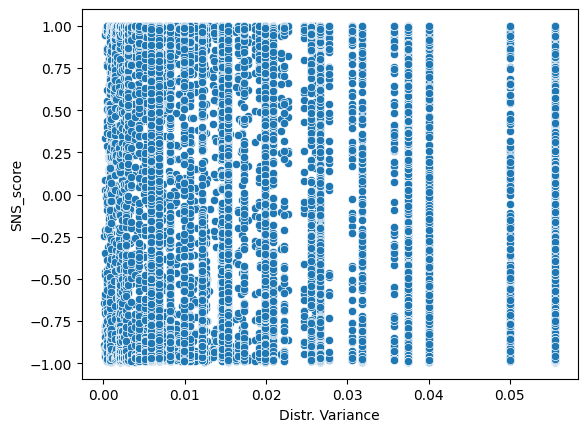

In [22]:
sns.scatterplot(imm_df, x="Distr. Variance", y="SNS_score")

In [18]:
from scipy.stats import pointbiserialr, kendalltau, pearsonr

In [15]:
pointbiserialr(imm_df["Target"], imm_df["SNS_score"])

SignificanceResult(statistic=0.08342445960891252, pvalue=1.485664231737939e-47)

In [19]:
pearsonr(imm_df["Target"], imm_df["SNS_score"])

PearsonRResult(statistic=0.08342445960891252, pvalue=1.485664231737939e-47)